In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
I_ampa_poisson=np.load('I_ampa_poisson.npy',allow_pickle=True)
I_ampa=np.load('I_ampa.npy',allow_pickle=True)

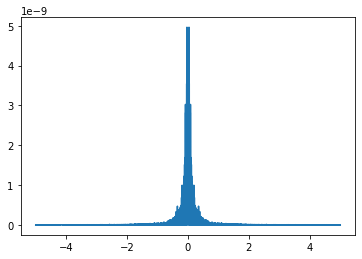

In [10]:
ps = np.abs(np.fft.fft(I_ampa_poisson))**2

time_step = 1 / 10
freqs = np.fft.fftfreq(I_ampa_poisson.size, time_step)
idx = np.argsort(freqs)
ps[0]=0
plt.plot(freqs[idx], ps[idx])

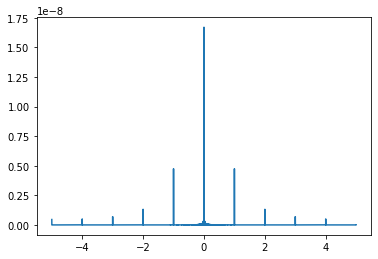

In [11]:
ps = np.abs(np.fft.fft(I_ampa))**2

time_step = 1 / 10
freqs = np.fft.fftfreq(I_ampa_poisson.size, time_step)
idx = np.argsort(freqs)
ps[0]=0

plt.plot(freqs[idx], ps[idx])